In [1]:
using CSV, DataFrames
using CairoMakie

### Parameter Dependency

In [2]:
region = "california"
magnitude_threshold = 0.0

results = CSV.read("./results/$region/$(region)_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size.csv", DataFrame)
first(results,5)

Row,cell_size,alpha,xmin,KS
,Float64,Float64,Float64,Float64
1,0.5,3.33504,46.0,0.0244906
2,1.0,3.03866,108.0,0.0225605
3,1.5,2.93319,238.0,0.0276943
4,2.0,2.50847,156.0,0.027515
5,2.5,3.47107,1272.0,0.0275452


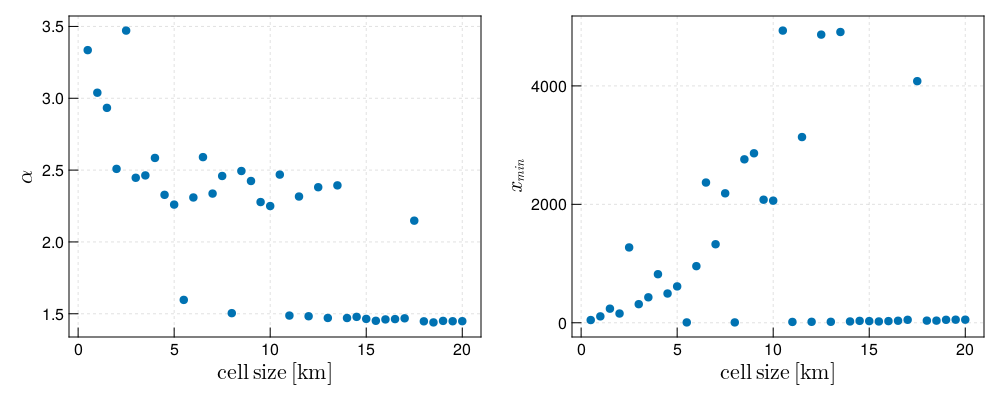

In [20]:
x = 0:0.05:4π
fig = Figure(resolution = (1000, 400), fonts = (; font= "C:/Windows/Fonts/CMU Serif.ttf")) ## probably you need to install this font in your system
xlabels = [L"\text{cell\,size\,[km]}", L"\text{cell\,size\,[km]}"]
ylabels = [L"\alpha", L"x_{min}"]
ax = [Axis(fig[1, i], xlabel = xlabels[i], ylabel = ylabels[i], ylabelsize = 22,
    xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
    xticksize = 10, ytickalign = 1, yticksize = 10) for i in 1:2]
scatter!(ax[1],results.cell_size, results.alpha;)
scatter!(ax[2],results.cell_size, results.xmin;)

# axislegend(L"f(x)"; position = :rt, bgcolor = (:grey90, 0.25));

save("text.png", fig, px_per_unit=5)

fig